# Практическое задание

В этом практическом задании мы поработаем с алгоритмом линейной регрессии и нормализацией признаков. Для начала загрузите данные из файла `data.csv`, который содержит 100 признаков f1, f2, ..., f100 и целевую переменную target. Для загрузки данных используете функцию `read_csv` из библиотеки `pandas`. Выделите матрицу признаков и целевую переменную из загруженных данных.

### *РЕШЕНИЕ*

In [1]:
import numpy as np
import pandas as pd

ds = pd.read_csv('data.csv')
ds.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f92,f93,f94,f95,f96,f97,f98,f99,f100,target
0,-1.979019,0.392456,1.195177,0.209349,-1.209435,0.868798,0.384209,-0.426571,-0.977939,-1.419877,...,-1.587188,-0.612423,-0.281845,-0.625773,-0.907327,-0.800223,0.065892,0.271684,-0.201420,-45.587910
1,0.613518,0.051946,0.238789,-0.071601,-0.080717,1.727543,-0.483886,0.635172,0.038003,1.573987,...,0.059630,0.120031,0.399223,0.494030,0.197600,0.652323,0.916328,-1.556582,-0.370614,137.329473
2,0.444198,-0.535317,0.664927,-0.327017,1.935154,-1.776012,0.207803,0.126178,0.252569,0.889037,...,0.195482,1.384532,0.522251,-0.127655,-0.403076,-0.111509,-0.183150,0.977816,-1.171654,141.355900
3,-1.485186,-0.101987,0.817982,-0.846498,-0.660834,-0.073107,-0.247340,-0.775607,1.015937,-1.075737,...,0.753417,-0.403380,0.087974,-1.525572,2.404838,0.011863,0.994299,-2.152914,-0.213593,-65.882640
4,0.276582,-0.208468,0.185689,0.508608,-1.527168,-1.373403,-0.481766,-2.854627,1.868818,-1.179460,...,-0.985540,0.419706,-0.610858,0.209534,-0.538048,0.164295,-0.984655,-0.598438,-0.887770,-333.409221


In [2]:
ds.target

0      -45.587910
1      137.329473
2      141.355900
3      -65.882640
4     -333.409221
          ...    
120     82.055263
121     65.950817
122     77.147045
123    -13.136238
124      1.627152
Name: target, Length: 125, dtype: float64

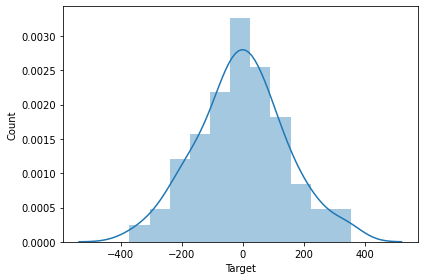

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (6, 4))
sns.distplot(ds.target)

plt.xlabel('Target')
plt.ylabel('Count')
plt.tight_layout()

In [4]:
y = ds['target']

ds.drop(['target'], axis = 1, inplace = True)

x = ds

In [5]:
x

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f91,f92,f93,f94,f95,f96,f97,f98,f99,f100
0,-1.979019,0.392456,1.195177,0.209349,-1.209435,0.868798,0.384209,-0.426571,-0.977939,-1.419877,...,-0.435248,-1.587188,-0.612423,-0.281845,-0.625773,-0.907327,-0.800223,0.065892,0.271684,-0.201420
1,0.613518,0.051946,0.238789,-0.071601,-0.080717,1.727543,-0.483886,0.635172,0.038003,1.573987,...,-0.349258,0.059630,0.120031,0.399223,0.494030,0.197600,0.652323,0.916328,-1.556582,-0.370614
2,0.444198,-0.535317,0.664927,-0.327017,1.935154,-1.776012,0.207803,0.126178,0.252569,0.889037,...,-2.603137,0.195482,1.384532,0.522251,-0.127655,-0.403076,-0.111509,-0.183150,0.977816,-1.171654
3,-1.485186,-0.101987,0.817982,-0.846498,-0.660834,-0.073107,-0.247340,-0.775607,1.015937,-1.075737,...,0.667245,0.753417,-0.403380,0.087974,-1.525572,2.404838,0.011863,0.994299,-2.152914,-0.213593
4,0.276582,-0.208468,0.185689,0.508608,-1.527168,-1.373403,-0.481766,-2.854627,1.868818,-1.179460,...,-1.511883,-0.985540,0.419706,-0.610858,0.209534,-0.538048,0.164295,-0.984655,-0.598438,-0.887770
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,0.372648,-0.450202,-0.637809,0.113971,1.193587,1.637212,1.178419,-0.047799,-1.285599,-1.671761,...,1.015221,-0.657035,-1.615846,-0.404157,0.810027,-1.333148,1.419036,0.144310,1.040058,-1.298104
121,-2.291293,0.441420,-0.080816,-0.258764,-0.278120,0.638957,0.748936,-0.893833,-0.435053,-3.232565,...,-1.631068,-0.421483,-1.478002,-0.518134,-2.248497,2.116012,-0.181734,0.043710,-1.572231,-0.903293
122,-0.735201,-2.426392,-0.716043,0.395799,-0.495878,0.307677,-1.890010,1.356583,-0.880754,-0.388243,...,-0.509213,1.351073,1.798725,1.070365,0.086111,-0.777371,0.388376,-3.007632,-0.009289,0.084168
123,1.288076,1.704102,0.505021,-1.820760,-0.345919,2.277086,2.042178,0.487775,-1.031966,2.394362,...,0.135925,-1.795643,-0.440259,0.731001,0.341660,0.733548,-2.074486,-0.766864,0.041287,-0.423890


In [6]:
y

0      -45.587910
1      137.329473
2      141.355900
3      -65.882640
4     -333.409221
          ...    
120     82.055263
121     65.950817
122     77.147045
123    -13.136238
124      1.627152
Name: target, Length: 125, dtype: float64

Далее, разделите загруженный датасет на тренировочную и тестовую выборку. Для этого используйте функцию `train_test_split` из модуля `sklearn.model_selection` с параметрами `random_state=42` и `test_size=0.33`. Обучите линейную регрессию на тренировочных данных и оцените среднеквадратическую ошибку на тестовых данных. Один из вариантов линейной регрессии в `scikit-learn` представлен классом `Ridge` из `sklearn.linear_model`.
Используйте параметр `random_state=42` в конструкторе класса при создании его экземпляра. Оценку среднеквадратичной ошибки проведите с помощью функции `mean_squared_error` из модуля `sklearn.metrics`. В качестве ответа `answer1` приведите это значение округлённое с точностью до двух знаков.

### *РЕШЕНИЕ*

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error


x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 42, test_size = 0.33)

In [8]:
print('Train set:  ', x_train.shape,  y_train.shape)
print('Test set:   ', x_test.shape,  y_test.shape)

Train set:   (83, 100) (83,)
Test set:    (42, 100) (42,)


In [9]:
x_train.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f91,f92,f93,f94,f95,f96,f97,f98,f99,f100
9,1.392039,-0.664651,-1.422230,-1.941859,0.809265,-0.491562,-0.528947,0.856976,-0.516847,0.084094,...,-1.438411,0.958816,0.619033,-0.443263,-1.353755,1.212129,-0.432295,0.880066,0.357661,-1.499181
33,-0.182161,0.091125,0.632216,0.604052,0.998218,-0.333486,0.338976,0.818766,0.879014,-0.122436,...,0.297160,-0.480574,-0.946491,0.281192,-0.504423,-1.932065,0.627680,2.206469,1.600098,-0.761941
62,0.072681,-0.617642,0.893698,-0.409687,-1.880010,-0.139397,-0.755792,0.572390,-1.909356,0.443002,...,0.522143,1.649481,1.318302,-1.731201,-2.906988,-0.283139,-0.707626,-0.372319,-1.466785,0.313184
25,0.522521,-0.216419,-0.335516,1.251947,-0.778309,-0.176134,0.001804,0.976507,-1.688034,1.054621,...,-0.242583,2.305637,-0.600748,-0.455342,0.686774,-0.701957,0.268413,1.612868,1.896123,2.054092
119,-1.179369,0.751099,-0.548200,-1.689183,0.028458,-0.262660,0.548320,-1.406815,0.960305,0.388312,...,1.640615,1.669070,0.462484,0.887504,2.184097,0.218534,0.537630,1.643378,0.506241,0.186416


Оценку среднеквадратичной ошибки проведите с помощью функции mean_squared_error из модуля sklearn.metrics. В качестве ответа answer1 приведите это значение округлённое с точностью до двух знаков.

In [10]:
model = Ridge()

In [11]:
model.fit(x_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [12]:
print('Accuracy: {}'.format(model.score(x_train, y_train)))

Accuracy: 0.9990067128806532


In [13]:
y_pred = model.predict(x_test)
y_pred[:10]

array([ -15.32270816, -129.7391101 ,  102.22966322,  200.44003412,
       -233.14913305,   97.75088143,  244.27617319,   99.87514912,
        208.76555175, -217.55127944])

In [14]:
y_test.shape

(42,)

In [15]:
y_pred.shape

(42,)

In [16]:
mse = mean_squared_error(y_test, y_pred)
answer1 = round(mse, 2)
mse

4921.829721173698

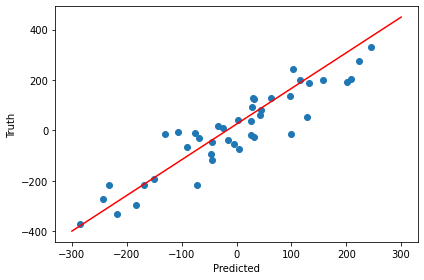

In [17]:
plt.figure(figsize = (6, 4))
plt.scatter(y_pred, y_test)
plt.xlabel('Predicted')
plt.ylabel('Truth')

plt.plot([-300, 300], [-400, 450], color = 'red')
plt.tight_layout()

Далее вам предлагается стандартизовать данные используя `StandardScaler` из `sklearn.preprocessing`. По своей сути операция стандартизации в данном случае представляет из себя вычитание среднего из матрицы признаков и деление на среднеквадратическое отклонение. 

<font color  = "red">Важно:</font> Сначала следует разбить выборку на тренировочную и тестовую и лишь потом стандартизировать их по отдельности. Помните, что к тренировочной выборке мы должны применять метод `fit_transform()`, а к тестовой только `transform()`. Как изменилось качество на тестовых данных? В `answer2` запишите значение среднеквадратической ошибки, округлённое с точностью до двух знаков после запятой.

In [18]:
from sklearn.preprocessing import StandardScaler


sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


In [19]:
model2 = Ridge()
model2.fit(x_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [20]:
print('Accuracy: {}'.format(model2.score(x_train, y_train)))

Accuracy: 0.9992784011276867


In [21]:
y_pred2 = model2.predict(x_test)
y_pred2[:10]

array([ -29.05928558, -131.04450753,  130.49274591,  196.90577218,
       -223.63282983,   88.34498911,  250.69710657,   95.56443307,
        219.10385992, -225.68259752])

In [22]:
y_test.shape

(42,)

In [27]:
y_pred2.shape

(42,)

In [24]:
mse2 = mean_squared_error(y_test, y_pred2)
answer2 = mse2
mse2

4194.998953266731

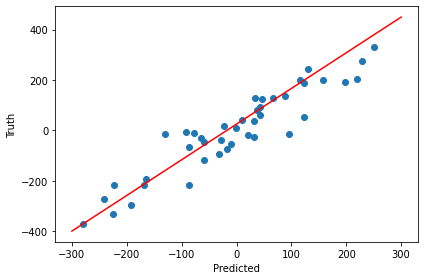

In [25]:
plt.figure(figsize = (6, 4))
plt.scatter(y_pred2, y_test)
plt.xlabel('Predicted')
plt.ylabel('Truth')

plt.plot([-300, 300], [-400, 450], color = 'red')
plt.tight_layout()

## Строка с ответами

In [26]:
print('mse 1: {0:.2f}\nmse 2: {1:.2f}'.format(answer1, answer2))

mse 1: 4921.83
mse 2: 4195.00
